In [1]:
#Figure - April 2024
#Plot maps of properties
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import glob

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
import statsmodels.api as sm

import cmocean
import colorcet as cc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

In [4]:
ds_input = xr.open_mfdataset('/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/INPUT/Input_obs9_*.nc')
ds_input = ds_input.transpose('time', 'latitude', 'longitude')
ds_input = ds_input.sel(latitude = slice(-50,50))
a = ds_input.mask.where(ds_input.mask==6)
mask = np.isnan(a)
mask = ~mask   
ds_input = ds_input.assign(variables={"mask": (('latitude','longitude'), mask.data)}) 


In [28]:
ds_input

<xarray.Dataset>
Dimensions:     (time: 336, latitude: 401, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-12-01
  * longitude   (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude    (latitude) float32 -50.0 -49.75 -49.5 -49.25 ... 49.5 49.75 50.0
    mask        (latitude, longitude) float64 dask.array<chunksize=(401, 1440), meta=np.ndarray>
Data variables:
    bathymetry  (time, latitude, longitude) float64 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    sst         (time, latitude, longitude) float32 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    u           (time, latitude, longitude) float64 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    v           (time, latitude, longitude) float64 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    u10         (time, latitude, longitude) float32 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    v10         (time, latitude, longitude) float32 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    ssr         (time, latitude, longitude) float32 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    sla         (time, latitude, longitude) float64 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
    mdt         (time, latitude, longitude) float64 dask.array<chunksize=(12, 401, 1440), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    history:                           Source data were: ESACCI-OC-L3S-OC_PRO...
    netcdf_file_type:                  NETCDF4_CLASSIC
    id:                                ESACCI-OC-L3S-CHLOR_A-MERGED-1M_MONTHL...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    summary:                           Data products generated by the Ocean C...
    tracking_id:                       95a34d3e-fe5a-4812-bd8a-9d7028d487f9

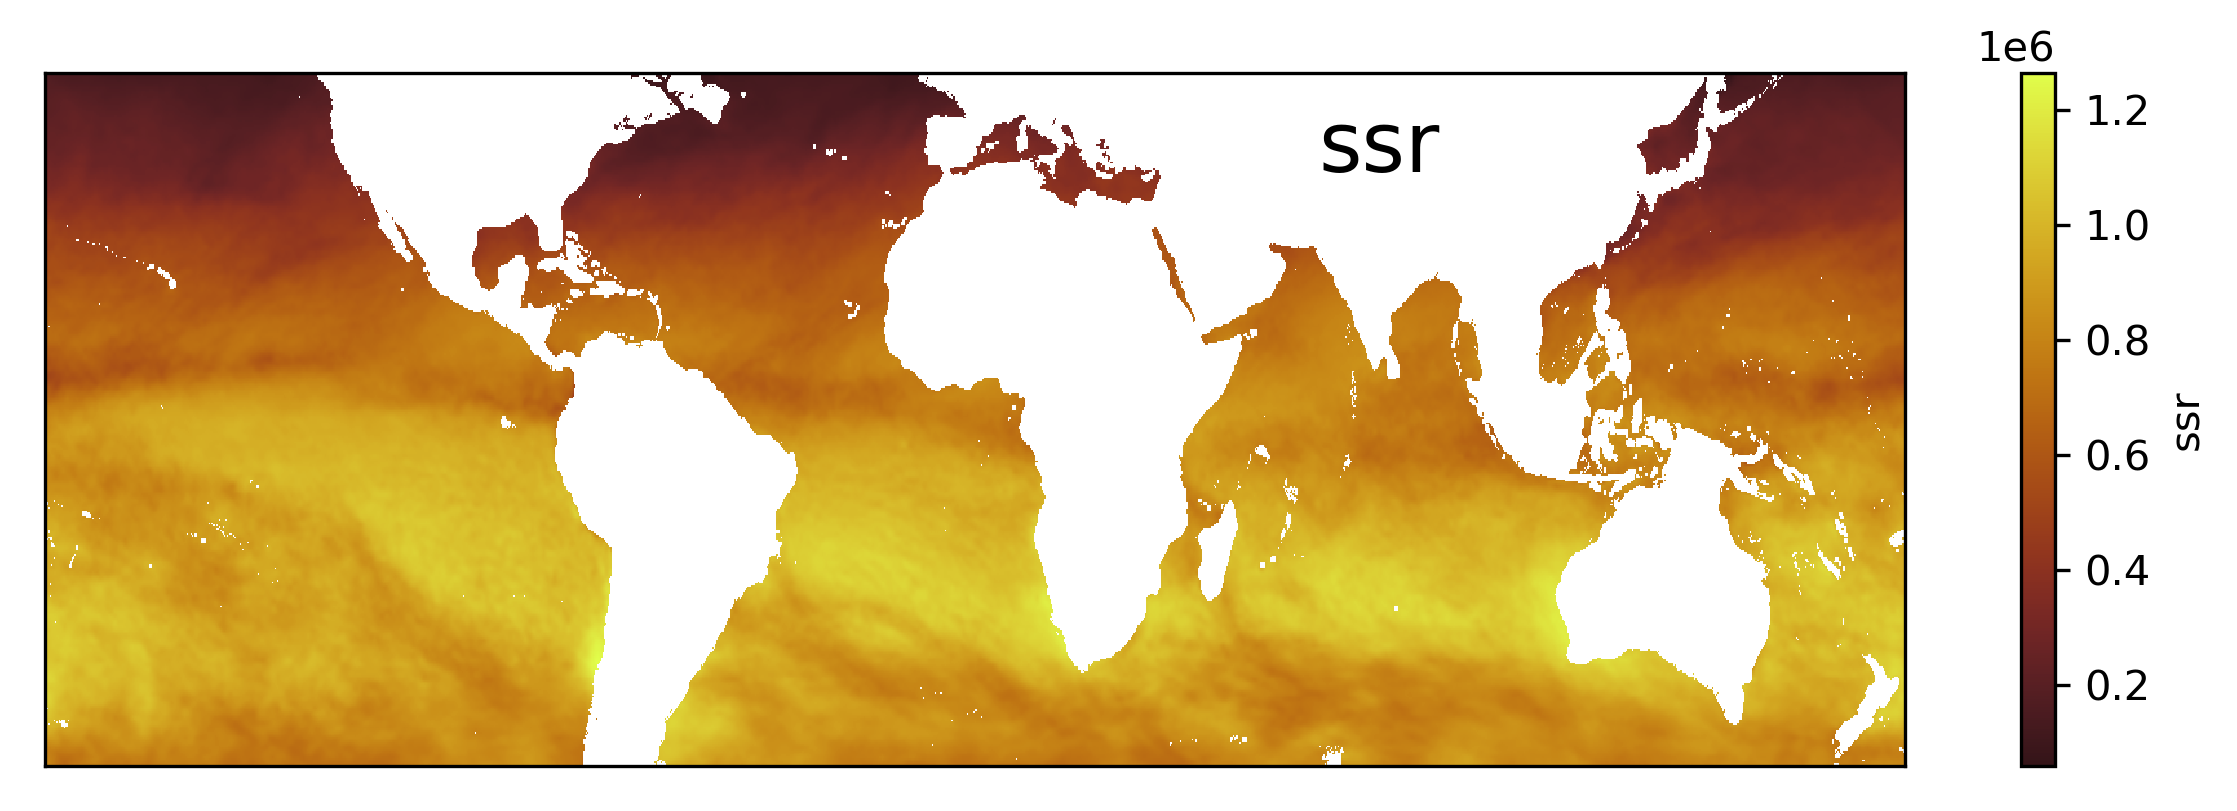

In [31]:
var = 'ssr'
# Assuming ds_input['sst'] is your data
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3), dpi=300)

# Plot the data
#im = ds_input[var].isel(time=0).plot(cmap=cmocean.cm.thermal, vmin=0, vmax=30, ax=ax1)
im = ds_input[var].isel(time=0).plot(cmap=cmocean.cm.solar, ax=ax1)

# Remove xtick labels and xticks
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('')

# Remove colorbar

# Add text in the upper right corner
ax1.text(0.75, 0.95, var, transform=ax1.transAxes, ha='right', va='top', fontsize=20)
plt.savefig('Figure_GRL/Fig2_'+var+'.png', bbox_inches='tight')

In [9]:
ds_out = xr.open_mfdataset('/home2/datawork/epauthen/Ocean-Colour-CCI/OC_CCI_Coarse/OC_CCI_chloro_a_*.nc')
ds_out = ds_out.rename({'chlor_a_coarse':'chloro'})
ds_out = ds_out.sel(latitude = slice(-50,50))
ds_out = ds_out.assign(variables={"mask": (('latitude','longitude'), ds_input.mask.data)}) 
ds_out = ds_out.where(ds_out.mask == 1)
ds_out.isel(time=100)

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 1440)
Coordinates:
    time       datetime64[ns] 2006-01-01
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 -50.0 -49.75 -49.5 -49.25 ... 49.5 49.75 50.0
Data variables:
    chloro     (latitude, longitude) float64 dask.array<chunksize=(401, 1440), meta=np.ndarray>
    mask       (latitude, longitude) float64 dask.array<chunksize=(401, 1440), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    history:                           Source data were: ESACCI-OC-L3S-OC_PRO...
    netcdf_file_type:                  NETCDF4_CLASSIC
    id:                                ESACCI-OC-L3S-CHLOR_A-MERGED-1M_MONTHL...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    summary:                           Data products generated by the Ocean C...
    tracking_id:                       95a34d3e-fe5a-4812-bd8a-9d7028d487f9

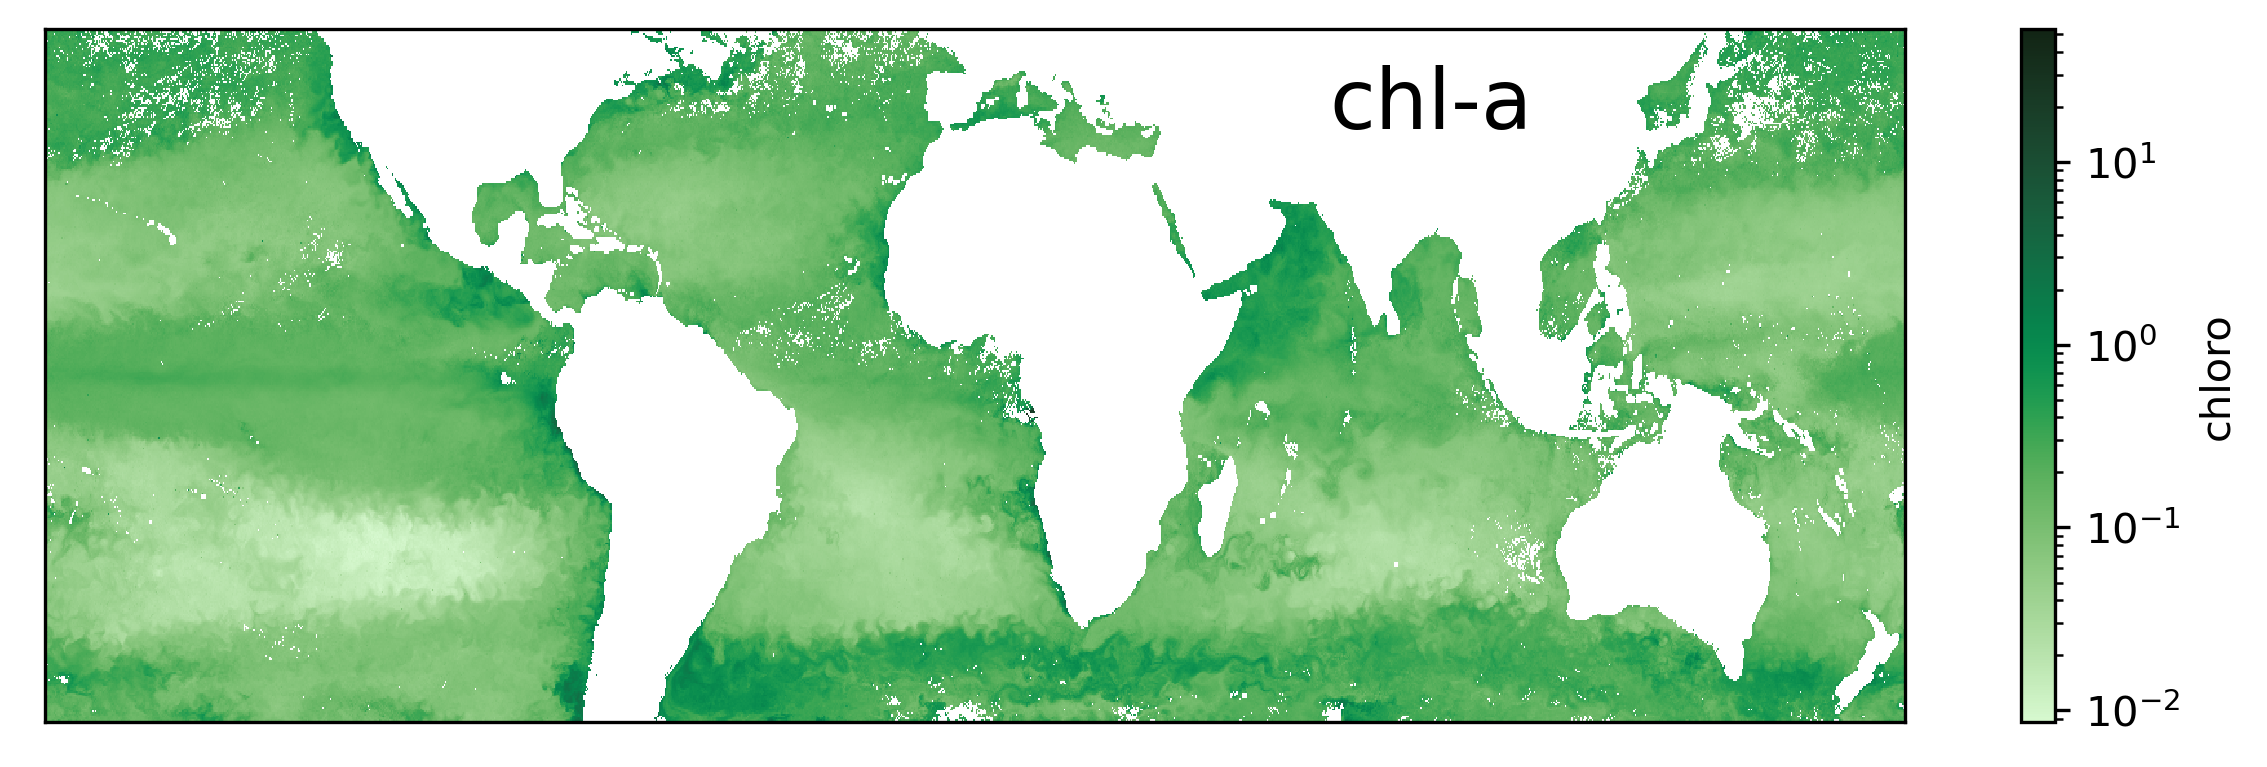

In [42]:
var = 'chloro'
# Assuming ds_input['sst'] is your data
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3), dpi=300)

# Plot the data
#im = ds_input[var].isel(time=0).plot(cmap=cmocean.cm.thermal, vmin=0, vmax=30, ax=ax1)
im = ds_out[var].isel(time=100).plot(cmap=cmocean.cm.algae, ax=ax1, norm=colors.LogNorm())

# Remove xtick labels and xticks
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('')

# Remove colorbar

# Add text in the upper right corner
ax1.text(0.8, 0.95, 'chl-a', transform=ax1.transAxes, ha='right', va='top', fontsize=20)
plt.savefig('Figure_GRL/Fig2_'+var+'.png', bbox_inches='tight')

In [10]:
ds_out = xr.open_mfdataset('/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/2023-11-07/CCIstrat17-05-42/Chloro_pred/Chloro_pred_2006-01-01.nc')
ds_out = ds_out.rename({'chloro_pred':'chloro'})
ds_out = ds_out.sel(latitude = slice(-50,50))
ds_out = ds_out.assign(variables={"mask": (('latitude','longitude'), ds_input.mask.data)}) 
ds_out = ds_out.where(ds_out.mask == 1)
ds_out

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 401, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2006-01-01
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 -50.0 -49.75 -49.5 -49.25 ... 49.5 49.75 50.0
    mask       (latitude, longitude) bool dask.array<chunksize=(401, 1440), meta=np.ndarray>
Data variables:
    chloro     (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 1440), meta=np.ndarray>

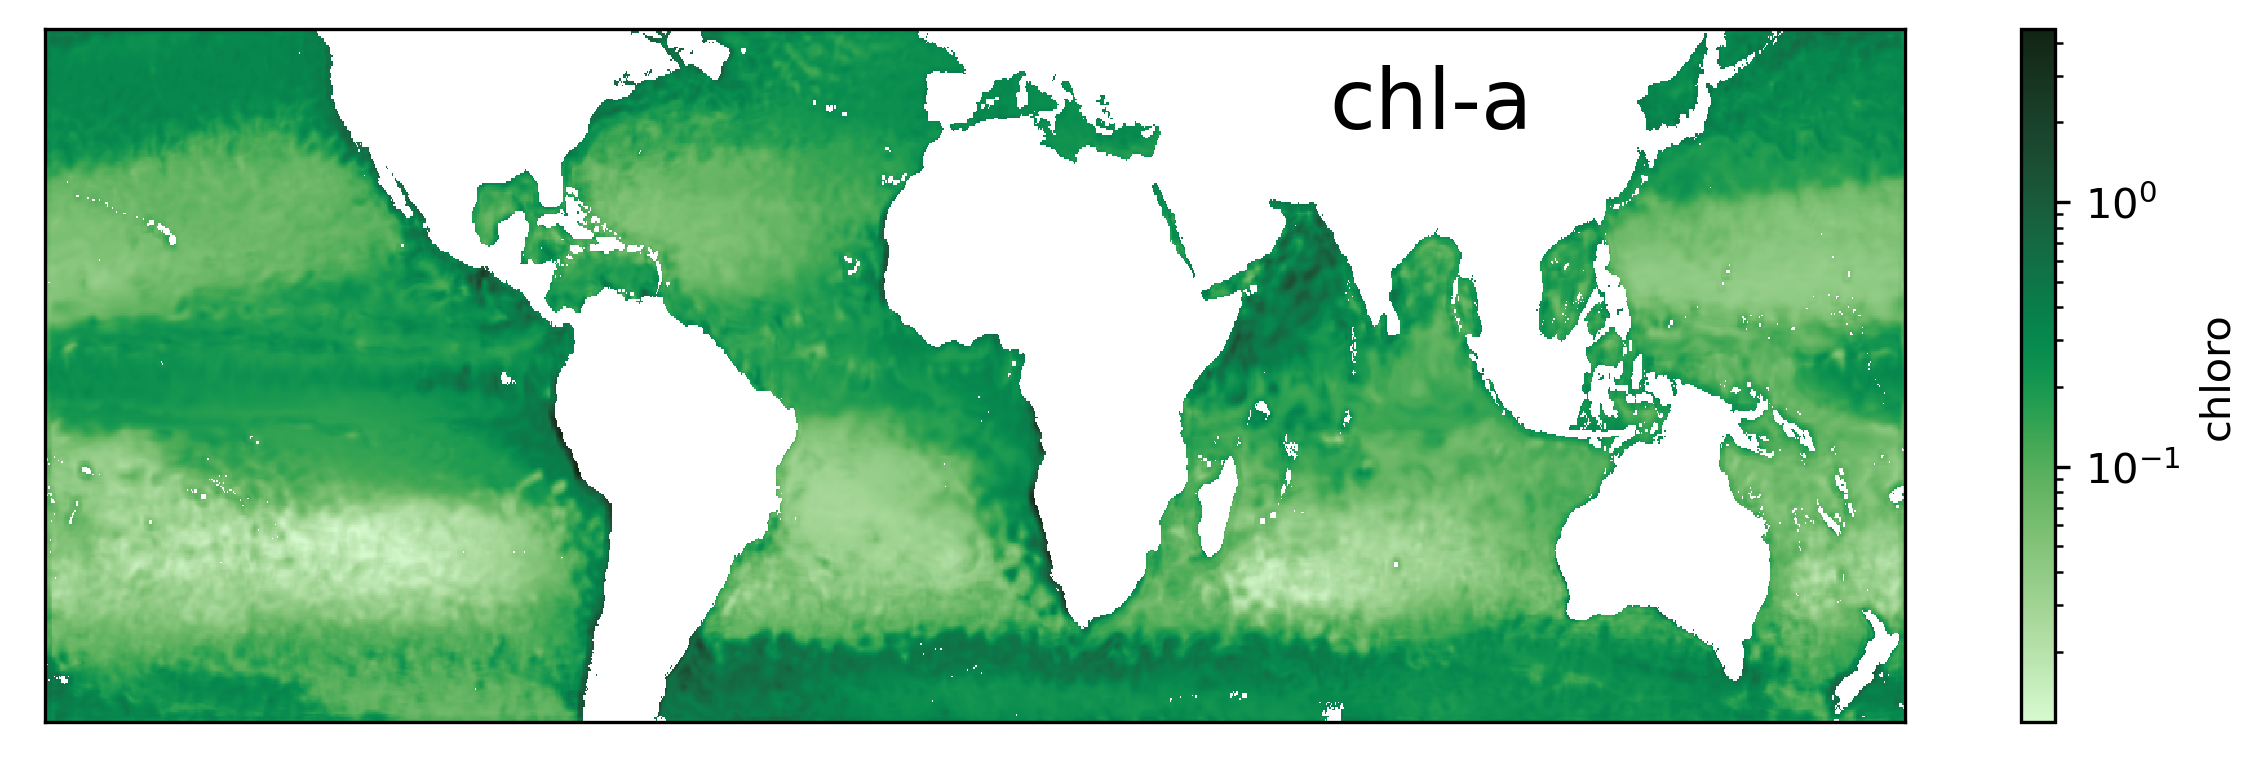

In [11]:
var = 'chloro'
# Assuming ds_input['sst'] is your data
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3), dpi=300)

# Plot the data
#im = ds_input[var].isel(time=0).plot(cmap=cmocean.cm.thermal, vmin=0, vmax=30, ax=ax1)
im = ds_out[var].plot(cmap=cmocean.cm.algae, ax=ax1, norm=colors.LogNorm())

# Remove xtick labels and xticks
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('')

# Remove colorbar

# Add text in the upper right corner
ax1.text(0.8, 0.95, 'chl-a', transform=ax1.transAxes, ha='right', va='top', fontsize=20)
plt.savefig('Figure_GRL/Fig2_pred_'+var+'.png', bbox_inches='tight')